<a href="https://colab.research.google.com/github/JonasSouza871/Introducao_Mistura_Gaussiana-GMM-/blob/main/An%C3%A1lise_de_Perfil_de_Consumo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Clusterização de dados em um shopping

- Dados obtidos em : https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data

- Contém gastos anuais de certos clientes:
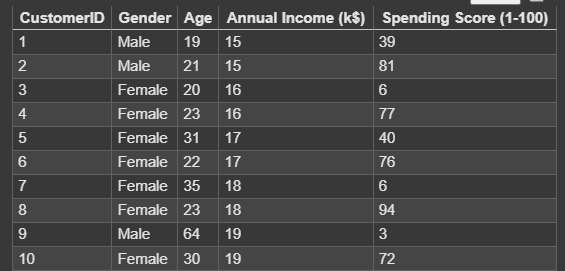

- Objetivo do projeto é clusterizar esses dados em diferentes grupos, para assim poder focar em um publico alvo.

- GMM:

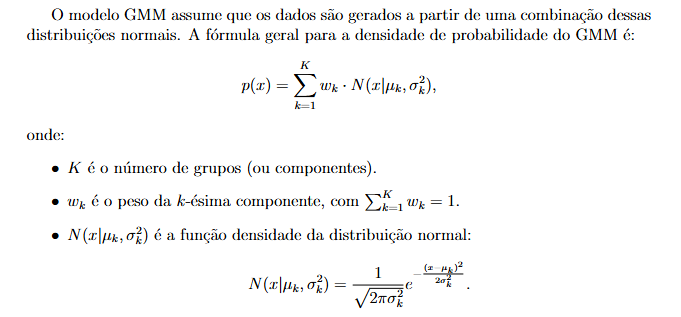

In [394]:
import pandas as pd #Leitura do arquivo CSV
import numpy as np #Calculo de algebra linear
import matplotlib.pyplot as plt #Plote de graficos
import seaborn as sns #Plot de informaçoes
from scipy.stats import multivariate_normal


In [395]:
df = pd.read_csv('/content/Mall_Customers.csv') #carrega o dataset

In [396]:
df.head(5) #Mostra os 5 primeiros

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [397]:
dados = df[['Annual Income (k$)', 'Spending Score (1-100)']].values #Selecionando apenas o que é importante para analise

In [398]:
media = np.mean(dados, axis=0) #calculo da media
desvio_padrao = np.std(dados, axis=0) #calculo do desvio padrao
dados_normalizados = (dados - media) / desvio_padrao #normaliza os dados

print(media)
print(desvio_padrao)
print(dados_normalizados)

[60.56 50.2 ]
[26.19897708 25.75888196]
[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]
 [-1.66266033  1.00159627]
 [-1.62449091 -1.71591298]
 [-1.62449091  1.70038436]
 [-1.58632148 -1.83237767]
 [-1.58632148  0.84631002]
 [-1.58632148 -1.4053405 ]
 [-1.58632148  1.89449216]
 [-1.54815205 -1.36651894]
 [-1.54815205  1.04041783]
 [-1.54815205 -1.44416206]
 [-1.54815205  1.11806095]
 [-1.50998262 -0.59008772]
 [-1.50998262  0.61338066]
 [-1.43364376 -0.82301709]
 [-1.43364376  1.8556706 ]
 [-1.39547433 -0.59008772]
 [-1.39547433  0.88513158]
 [-1.3573049  -1.75473454]
 [-1.3573049   0.88513158]
 [-1.24279661 -1.4053405 ]
 [-1.24279661  1.23452563]
 [-1.24279661 -0.7065524 ]
 [-1.24279661  0.41927286]
 [-1.20462718 -0.74537397]
 [-1.20462718  1.42863343]
 [-1.16645776 -1.7935561 ]
 [-1.16645776  0.88513158]
 [-1.05194947 -1.7935561 ]
 [-1.05194947  1.62274124]
 [-1.05194947 -1.4053405 ]
 [-1.05194947  

In [410]:
n_componentes = 5 #separa em 5 clusters
n_caracteristicas = df.shape[1] #Numero de colunas no conjunto de dados
n_amostras = df.shape[0] #Numero de linhas no conjunto de dados

print(n_caracteristicas)
print(n_amostras)

2
200


In [400]:
np.random.seed(42) #Garante reprodutibilidade nos resultados
pesos = np.ones(n_componentes) / n_componentes #calculo do peso apartir do numero de componentes escolhidos, eles terão igual valor por exemplo, se 3 componentes, teremos [0.33 , 0.33, 0.33]
medias = dados_normalizados[np.random.choice(dados_normalizados.shape[0], n_componentes, replace=False)] #Selecionar pontos aleatórios dos dados como médias iniciais das componentes
covariancias = [np.cov(dados_normalizados.T) for _ in range(n_componentes)]  #Criar matrizes de covariância iniciais para cada componente

In [401]:
def densidade_normal_multivariada(x, media, covariancia):
    n = media.shape[0]
    diferenca = x - media
    return (1. / (np.sqrt((2 * np.pi)**n * np.linalg.det(covariancia))) *
            np.exp(-0.5 * np.dot(np.dot(diferenca.T, np.linalg.inv(covariancia)), diferenca))) #Calculo GMM

In [402]:
# Algoritmo EM para maximizar o resultados
max_iteracoes = 100 #100 interaçoes no maximo para encontrar um valor
tolerancia = 1e-4  #As interaçoes irão parar quando atigir a tolerancia

In [403]:
for iteracao in range(max_iteracoes): #para as interaçoes até o maximo
    responsabilidades = np.zeros((n_amostras, n_componentes))
    for k in range(n_componentes): #para as componentes
        responsabilidades[:, k] = pesos[k] * np.array([densidade_normal_multivariada(x, medias[k], covariancias[k]) for x in dados_normalizados])
    responsabilidades /= responsabilidades.sum(axis=1, keepdims=True)

    # Resto do código permanece similar

    # Passo M (Maximização)
    N_k = responsabilidades.sum(axis=0)
    pesos_novos = N_k / n_amostras #Calculo de novos pesos
    medias_novas = np.dot(responsabilidades.T, dados_normalizados) / N_k[:, np.newaxis] #novas medias

    covariancias_novas = np.array([ #novas covariancias
        np.dot((responsabilidades[:, k][:, np.newaxis] * (dados_normalizados - medias_novas[k])).T,
               (dados_normalizados - medias_novas[k])) / N_k[k]
        for k in range(n_componentes)
    ])

    # Verificação de convergência
    if (np.allclose(pesos, pesos_novos, atol=tolerancia) and
        np.allclose(medias, medias_novas, atol=tolerancia) and
        np.allclose(covariancias, covariancias_novas, atol=tolerancia)):
        break

    pesos, medias, covariancias = pesos_novos, medias_novas, covariancias_novas


print(pesos_novos)
print(medias_novas)
print(covariancias_novas)

[0.19677577 0.10297313 0.12399016 0.16360071 0.41266022]
[[ 0.97989014  1.23493727]
 [-1.35464278  1.1650253 ]
 [-1.26612032 -1.06636906]
 [ 1.0849455  -1.33043673]
 [-0.17893224 -0.03172676]]
[[[ 0.39230686 -0.00521534]
  [-0.00521534  0.13281139]]

 [[ 0.0726856  -0.00151156]
  [-0.00151156  0.14726241]]

 [[ 0.1035474   0.05584852]
  [ 0.05584852  0.29121219]]

 [[ 0.39464853  0.08186716]
  [ 0.08186716  0.12270606]]

 [[ 0.13439935 -0.04468412]
  [-0.04468412  0.07673553]]]


In [404]:
responsabilidades*100

array([[2.13066403e-06, 9.74967777e-02, 9.99015314e+01, 1.78998855e-06,
        9.67910735e-04],
       [1.89931414e-02, 9.99780850e+01, 3.82755806e-04, 1.17102880e-22,
        2.53911314e-03],
       [1.07090171e-16, 9.99161537e-11, 9.99834220e+01, 1.65779628e-02,
        5.49273217e-18],
       [1.80642504e-02, 9.99649712e+01, 2.03111794e-03, 1.44386175e-20,
        1.49333962e-02],
       [4.28404740e-06, 1.56022885e-01, 9.98398093e+01, 1.59576388e-06,
        4.16191956e-03],
       [1.90676471e-02, 9.99521199e+01, 3.50746304e-03, 6.02117862e-20,
        2.53049898e-02],
       [1.46504167e-16, 1.13897293e-10, 9.99768142e+01, 2.31857735e-02,
        2.49260199e-17],
       [3.24300671e-02, 9.99675583e+01, 9.00388729e-06, 9.62593590e-29,
        2.60977664e-06],
       [1.53361080e-17, 1.49388703e-11, 9.99600129e+01, 3.99870778e-02,
        1.05498036e-18],
       [2.06096051e-02, 9.98046978e+01, 2.29869116e-02, 9.44614966e-18,
        1.51705692e-01],
       [8.93169183e-14, 2.6153

In [405]:
labels = responsabilidades.argmax(axis=1) #Verifica todas as linhas de responsabilidade e verifica em qual o dado tem mais chance de pertenecer
df['Cluster'] = labels

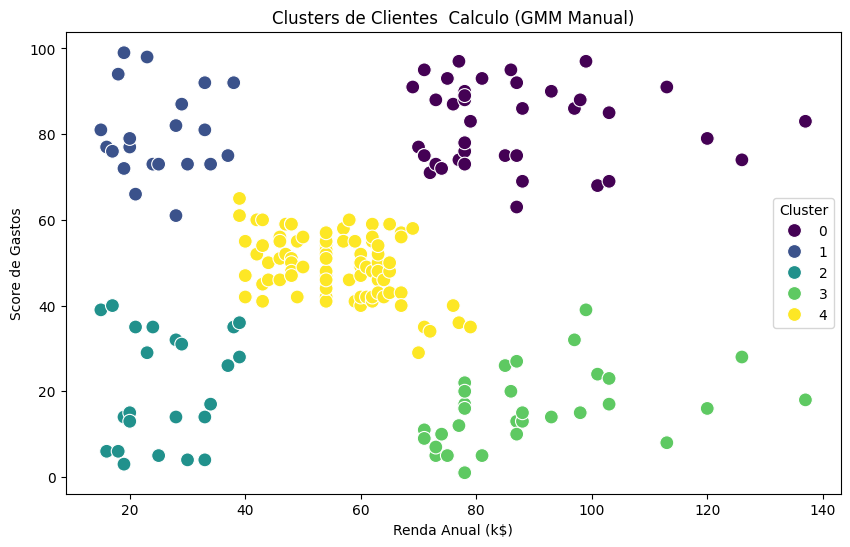

In [406]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Annual Income (k$)', y='Spending Score (1-100)',
    hue='Cluster', data=df, palette='viridis', s=100
)
plt.title('Clusters de Clientes  Calculo (GMM Manual)')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Score de Gastos')
plt.legend(title='Cluster')
plt.show()

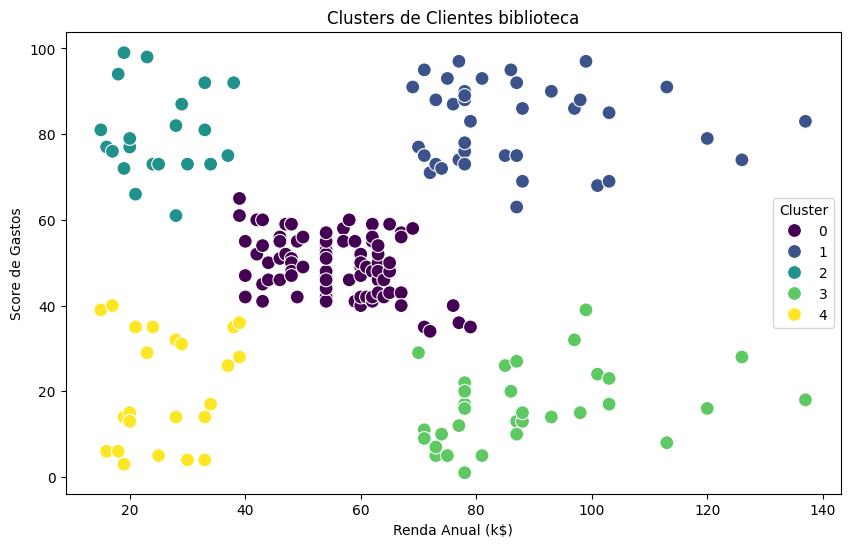

In [407]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregar os dados
df = pd.read_csv('Mall_Customers.csv')

# 2. Selecionar variáveis relevantes (Renda Anual e Score de Gastos)
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]



# 4. Aplicar o modelo GMM
gmm = GaussianMixture(n_components=5, random_state=42)  # Escolha 3 clusters como exemplo
gmm.fit(data_scaled)

# 5. Obter os rótulos dos clusters
labels = gmm.predict(data_scaled)
df['Cluster'] = labels

# 6. Visualizar os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Annual Income (k$)', y='Spending Score (1-100)',
    hue='Cluster', data=df, palette='viridis', s=100
)
plt.title('Clusters de Clientes biblioteca')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Score de Gastos')
plt.legend(title='Cluster')
plt.show()
